In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress = True, linewidth = 120, edgeitems = 5)
sns.set_theme(style="whitegrid")

In [38]:
dataPath = "../Data/Raw/parsed_books_data.tsv"

df = pd.read_csv(dataPath, sep = "\t", na_values = ["NA"])

print(df.columns)

Index(['price', 'title', 'rating', 'num_ratings', 'num_reviews', 'num_pages', 'genres', 'publication_year', 'author', 'author_book_count', 'author_followers_count', 'five_star_count', 'five_star_percentage', 'four_star_count', 'four_star_percentage', 'three_star_count', 'three_star_percentage', 'two_star_count', 'two_star_percentage', 'one_star_count', 'one_star_percentage', 'votes', 'category', 'award_year'], dtype='object')


2. How does a big audience affects the book's performance. yes bigger audience often mean more publicity, but at the same time it will be harder to please everyone. What is the relationship between follower counts and ratings/num votes and num ratings. Aso, is the success of previous books another factor affecting a book's performance?

a)

In [8]:
print("Value counts:")
print(df["author_followers_count"].value_counts())

print("\n\n")

print("Describe:")
print(df['author_followers_count'].describe())

Value counts:
author_followers_count
10800.0     23
259000.0    21
868000.0    20
118000.0    19
14500.0     19
            ..
738.0        1
2551.0       1
372.0        1
4227.0       1
5439.0       1
Name: count, Length: 2085, dtype: int64



Describe:
count      5278.000000
mean      27791.738916
std       87762.918476
min           2.000000
25%         691.250000
50%        3589.500000
75%       16700.000000
max      868000.000000
Name: author_followers_count, dtype: float64


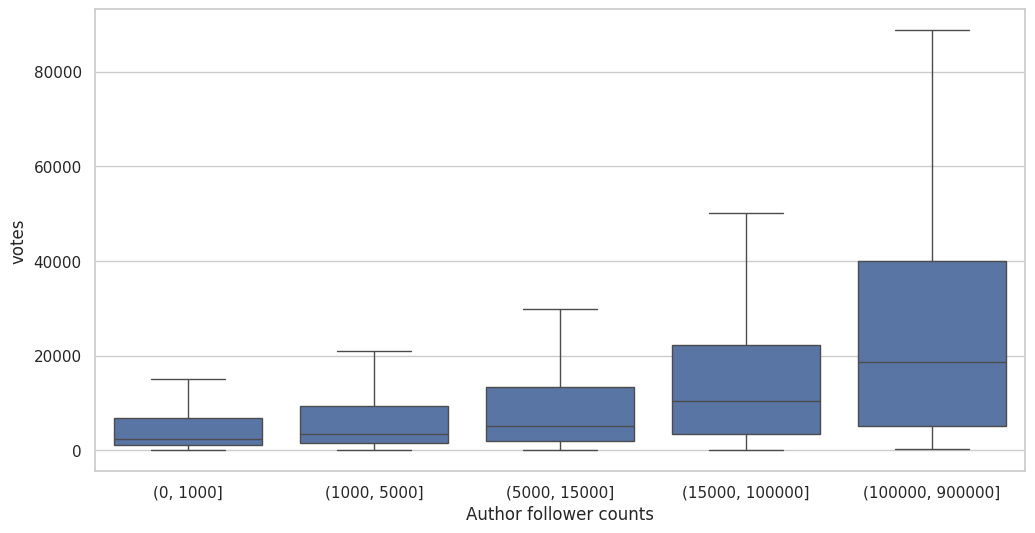

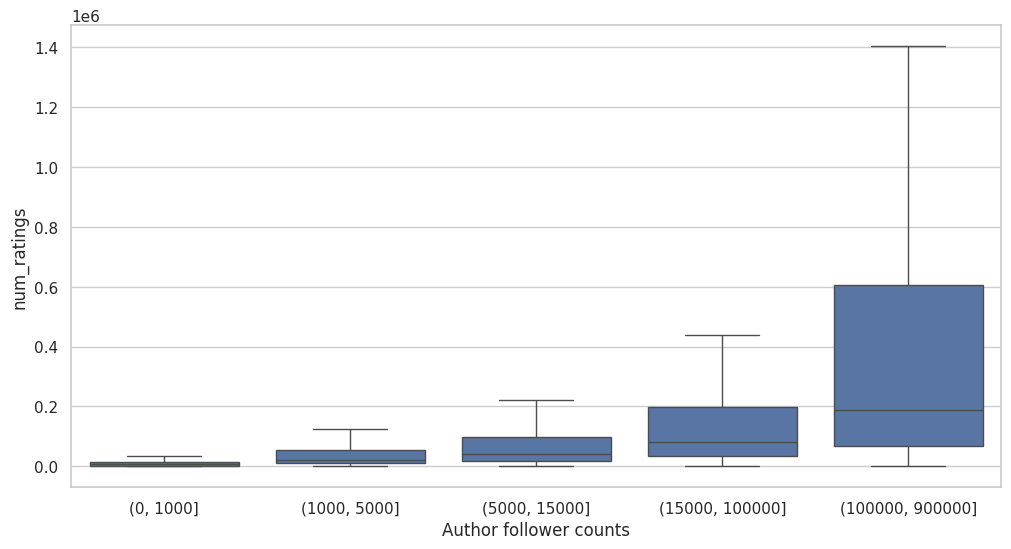

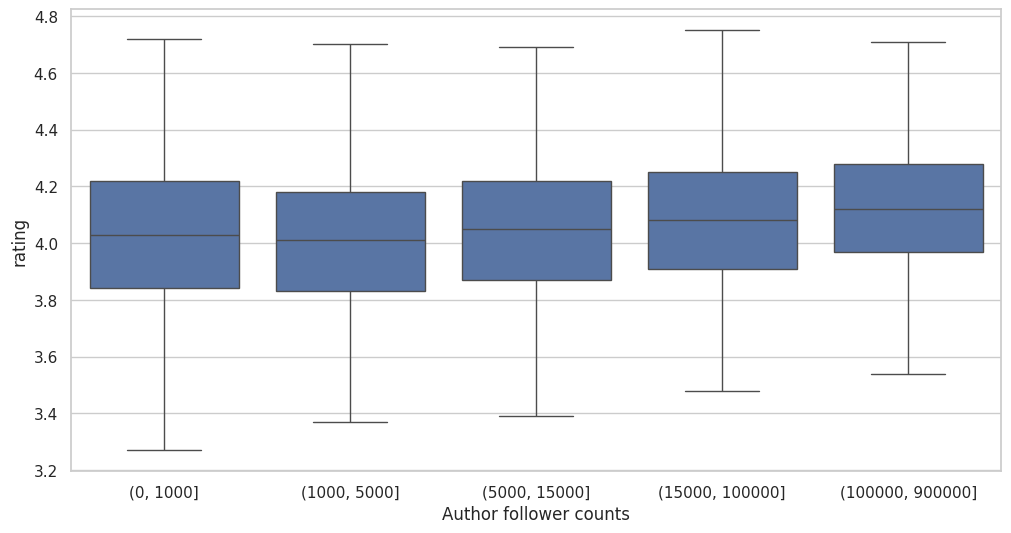

In [59]:
bins = [0, 1000, 5000, 15000, 100000, 900000]
df["binned"] = pd.cut(df["author_followers_count"], bins)
for column in ["votes", "num_ratings", "rating"]:
    plt.figure(figsize=(12, 6))

    sns.boxplot(
        x=df["binned"], 
        y=df[column], 
        data=df.groupby("binned", observed=True)[column].apply(pd.DataFrame), 
        # palette="viridis", 
        showfliers=False
    ).set(
        xlabel = "Author follower counts",
    )

    plt.show()

The median lines increase as the author's follower count rises, indicating that a larger audience positively impacts the book's performance.

Rating trung binh tac gia co danh tieng > rating it noi tieng

---

b)

In [10]:
print("Value counts:")
print(df["author_book_count"].value_counts())

print("\n\n")

print("Describe:")
print(df['author_book_count'].describe())

Value counts:
author_book_count
3       185
4       157
5       148
2       144
7       144
       ... 
350       1
278       1
445       1
434       1
4105      1
Name: count, Length: 343, dtype: int64



Describe:
count    5283.000000
mean       93.177740
std       262.105106
min         1.000000
25%         9.500000
50%        26.000000
75%        76.000000
max      4105.000000
Name: author_book_count, dtype: float64


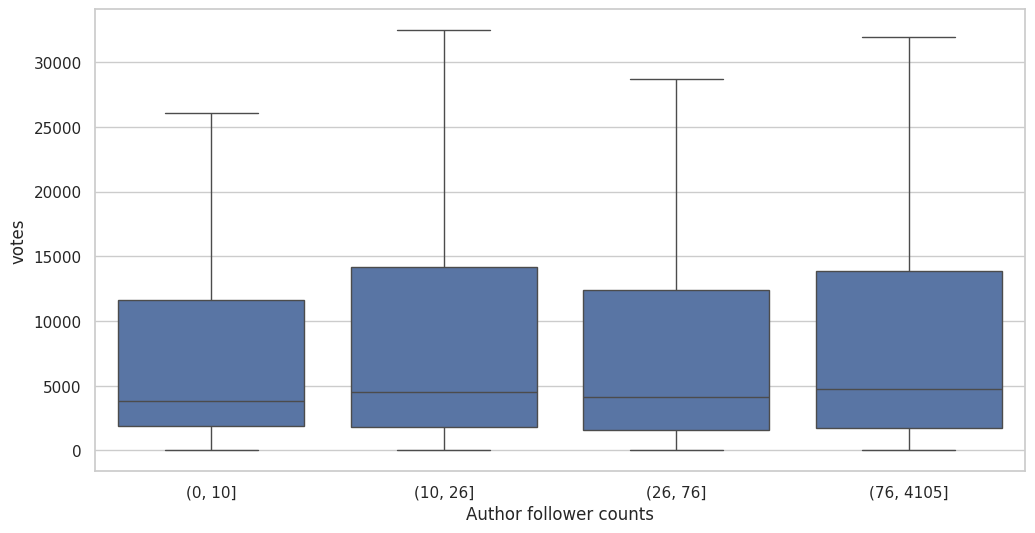

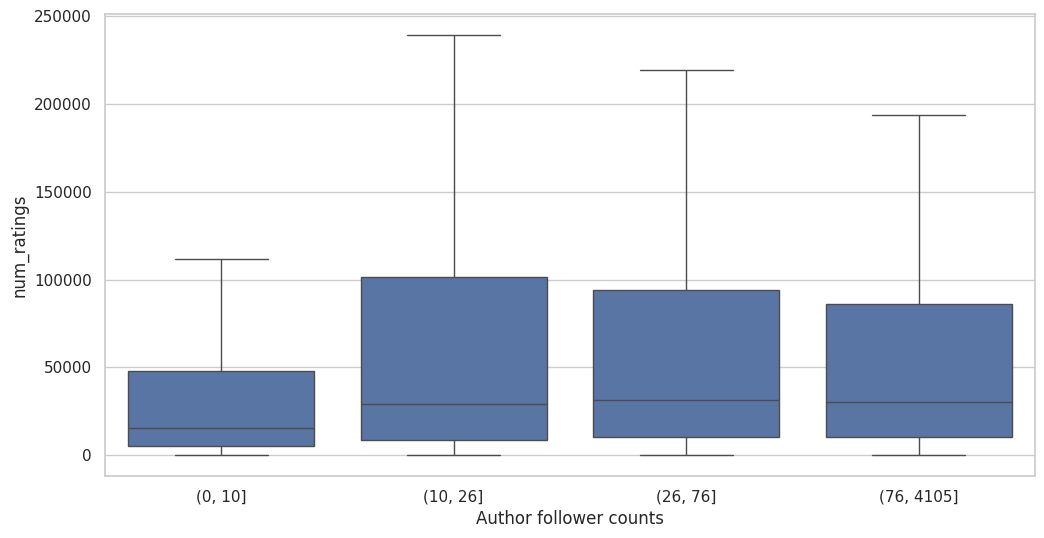

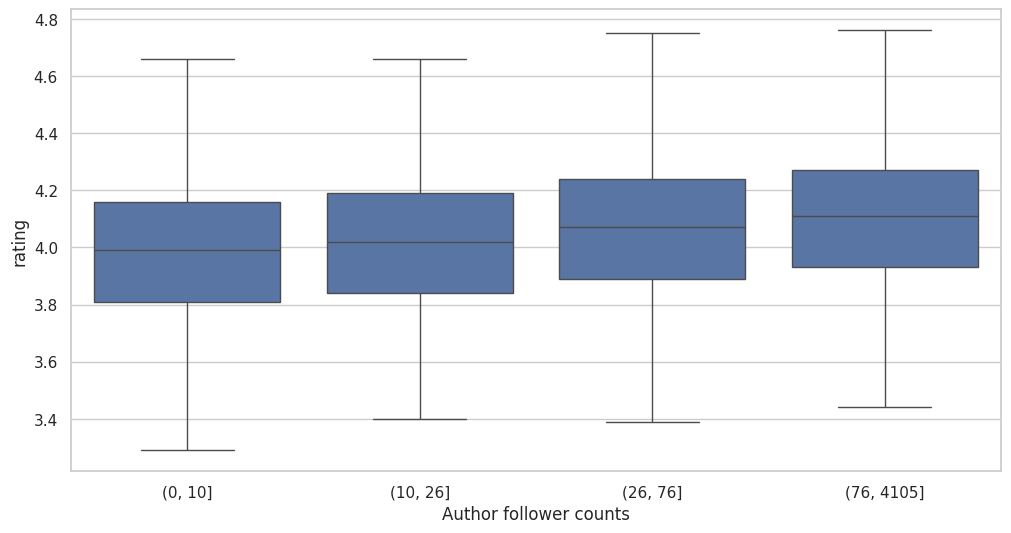

In [58]:
bins = [0, 10, 26, 76, 4105]
df["binned"] = pd.cut(df["author_book_count"], bins)
for column in ["votes", "num_ratings", "rating"]:
    plt.figure(figsize=(12, 6))

    sns.boxplot(
        x=df["binned"], 
        y=df[column], 
        data=df.groupby("binned", observed=True)[column].apply(pd.DataFrame), 
        # palette="viridis", 
        showfliers=False
    ).set(
        xlabel = "Author book counts"
    )

    plt.show()

4. How does pricing affects a book's rating, publicity.

In [12]:
df_nonna = df[(df["price"] != 0) & ~(df["price"].isna())]

In [13]:
df_nonna["price"].describe()

count    2814.000000
mean       11.113088
std         3.504282
min         0.990000
25%         8.990000
50%        11.990000
75%        13.990000
max        36.480000
Name: price, dtype: float64

In [14]:
df_nonna["price"].value_counts()

price
9.99     431
12.99    331
11.99    329
13.99    320
14.99    313
        ... 
30.13      1
17.72      1
7.21       1
14.39      1
8.07       1
Name: count, Length: 139, dtype: int64

In [ ]:
df[df["price"]

In [43]:
df.loc[df["price"] == 0, "price"] = -1
df.loc[df["price"].isna(), "price"] = -2

In [50]:
bins = [-3, -2, 0, 9, 12, 14, 36]
df["binned"] = pd.cut(df["price"], bins)

In [51]:
df["binned"].unique()

[(14.0, 36.0], (9.0, 12.0], (12.0, 14.0], (-3.0, -2.0], (-2.0, 0.0], (0.0, 9.0], NaN]
Categories (6, interval[int64, right]): [(-3, -2] < (-2, 0] < (0, 9] < (9, 12] < (12, 14] < (14, 36]]

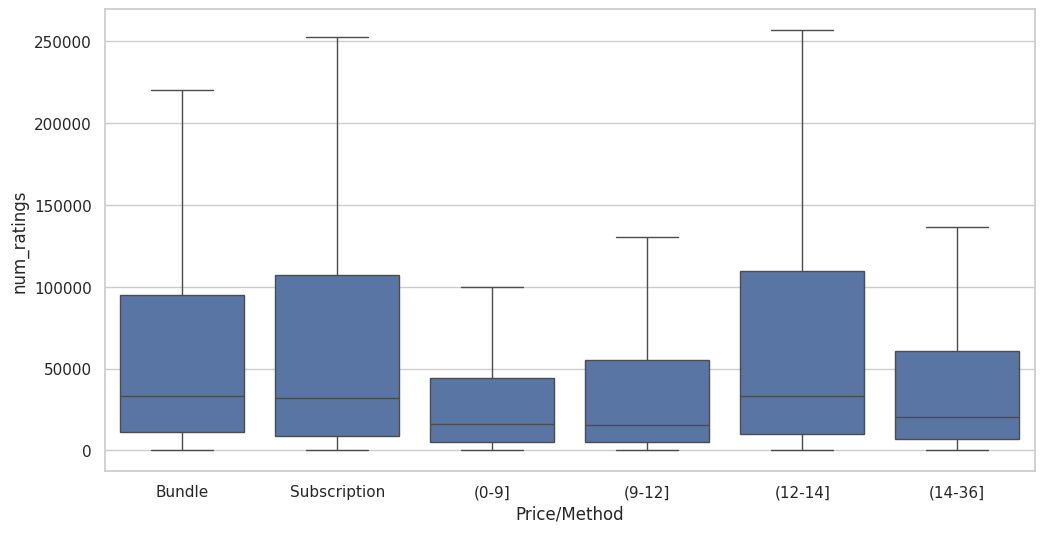

In [56]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(
    x=df["binned"], 
    y=df["num_ratings"], 
    data=df.groupby("binned", observed=True)["num_ratings"].apply(pd.DataFrame),
    showfliers=False
)
ax.set_xticks(range(6))
ax.set_xticklabels(["Bundle", "Subscription", "(0-9]", "(9-12]", "(12-14]", "(14-36]"])
ax.set_xlabel("Price/Method")

plt.show()

b)

In [60]:
df_na = df[df["price"] == -2]
df_0 = df[df["price"] == -1]

In [61]:
df_na["num_ratings"].describe()

count    2.031000e+03
mean     1.230330e+05
std      3.304099e+05
min      3.600000e+01
25%      1.121650e+04
50%      3.337100e+04
75%      9.505000e+04
max      4.204761e+06
Name: num_ratings, dtype: float64

In [62]:
df_0["num_ratings"].describe()

count    4.380000e+02
mean     1.232800e+05
std      2.728595e+05
min      1.000000e+01
25%      8.888500e+03
50%      3.196150e+04
75%      1.068905e+05
max      2.771997e+06
Name: num_ratings, dtype: float64

In [63]:
df_nonna["num_ratings"].describe()

count    2.814000e+03
mean     9.180281e+04
std      2.951066e+05
min      3.800000e+01
25%      6.447250e+03
50%      1.941950e+04
75%      6.328875e+04
max      5.464757e+06
Name: num_ratings, dtype: float64

The substantially higher mean of ratings for subscription books suggests they may represent a more appealing market